# Robotski Manipulator

Da uspešno opravite vajo, jo morate predstaviti asistentu na vajah. Pri nekaterih nalogah so vprašanja, ki zahtevajo skiciranje, ročno računanje in razmislek. Končno rešitev na takšna vprašanja vpišite v predvideni prostor, postopek reševanja pa razložite asistentu na vajah. Deli nalog, ki imajo pred navodilom navedene točke, niso obvezni. Brez njih lahko za celotno vajo dobite največ **75** točk (zgornja meja je **100** točk kar pomeni oceno 10). V nekaterih vajah je dodatnih nalog več in vam ni potrebno opraviti vseh.

In [1]:
# Run this cell to download the data used in this exercise
import zipfile, urllib.request, io
zipfile.ZipFile(io.BytesIO(urllib.request.urlopen("https://data.vicos.si/lukacu/rrz/vaja3.zip").read())).extractall()

## Uvod - Krmiljenje robotskega manipulatorja

V okviru te naloge si bomo ogledali način za krmiljenje pravega (in navideznega) robotskega manipulatorja. V Laboratoriju za umetne vizualne spoznavne sisteme (LUVSS) je bil razvit robotski manipulator za pedagoške potrebe, ki ga lahko iz lastnega računalnika krmilite preko lokalne mreže. V laboratoriju imamo devet fizičnih manipulatorjev, ki so med delovnim časom na voljo študentom za uporabo tudi izven terminov vaj. Da pa lahko vsaj delno na vaji delate tudi doma je bila narejena slika sistema za virtualni stroj VirtualBox, ki vam omogoča, da krmiljenje manipulatorja preizkušate doma. Seveda pa v tem primeru nimate na voljo možnosti manipulacije okolja, lahko pa testirate zaznavo ter upravljanje s programskim vmesnikom.

### Vzpostavitev povezave s fizičnim robotskim manipulatorjem

1. V laboratoriju se povežite na <i>TurtleNet</i> mrežo (podatke za povezavo boste dobili na vajah). 
2. Priklopite želeni manipulator na napajanje.
3. Na manipulatorju preberite ID roke (npr. <i>'Roka #6'</i>), ki vam pove IP roke - v tem primeru <i>'roka6.local'</i>. Ker je podpora za
4. Povežite se na manipulator ter aktivirajte napajanje motorjev v sklepih z uporabo strojnega stikala na krmilni plošči.

V primeru, da bo manipulator prišel v položaj, ko se bo kakšen motor zataknil ob oviro, čimprej izklopite napajanje motorjev z uporabo strojnega stikala na krmilni plošči, da se prepreči okvara motorjev.

**Opozorilo:** Ker boste robotske manipulatorje lahko uporabljali le v fakultetnih prostorih, na samih vajah pa verjetno ne bo dovolj časa, niti dovolj manipulatorjev za vse študente, se z asistentom dogovorite za termine, ko bodo roboti na voljo za uporabo v laboratoriju. Doma lahko že vse vaje vsaj okvirno preverite v simulacijskem načinu.

### Uporaba virutalnega stroja

1. Iz spletne učilnice si prenesite <a href="https://ucilnica.fri.uni-lj.si/mod/url/view.php?id=17871">sliko navideznega okolja</a>.
2. Prenesite si <a href="https://www.virtualbox.org/wiki/Downloads">VirtualBox</a> ter <a href="https://www.virtualbox.org/wiki/Downloads">VirtualBox Extension Pack</a> za delo s spletno kamero.
    1. <i>Opomba: Spletno kamero obvezno dodajte kot USB2.0 ali USB3.0</i>
    2. <i>Opomba: Če spletne kamere nimate, lahko uporabite namesto nje tudi pametni telefon. Več o tem si preberite spodaj.    </i>
3. Namestite VirtualBox in naložite sliko navideznega robotske manipulatorja.
    1. V glavnem meniju izberite <i>Machine</i> ter <i>Add...</i> in poiščite sliko navideznega robotskega manipulatorja na računalniku.
    2. <i>Opomba: Če delate v Windows okolju, potem morate izklopiti <a href="https://support.microsoft.com/en-us/help/3204980/virtualization-applications-do-not-work-together-with-hyper-v-device-g">Hyper-V</a> hypervisor.</i>
4. Za navidezni stroj dodajte nov Network adapter (<i>Settings</i> in <i>Network</i>) in nastavite opcije <i>Attached to</i> na <b>"NAT"</b>. To vam bo omogočilo dostop do interneta iz navideznega stroja.
5. Poženite navidezni stroj ter ga posodobite na najnovejšo verzijo z izvedbo ukaza <b>"sudo apt-get update && sudo apt-get --with-new-pkgs upgrade"</b> ter izbiro funkcije <b>(3 - Upgrade system)</b>. Do terminala dostopate z izbiro funkcije (4 - Exit to terminal). Geslo za administratorski način je <i>manus</i>. Podatki o vaši trenutni verziji navideznega stroja so prikazi v glavnem meniju navideznega stroja desno spodaj. Za uspešno opravljanje vaj boste potrebovali verzijo 2.33. V kolikor te verzije nimate, posodobite še ustrezne manjkajoče pakete.
6. Izklopite navidezni stroj (5 - Shutdown) ter spremenite nastavitev <i>Attached to</i> Network adapter-ja v <b>"Host-only adapter"</b>. To vam bo omogočilo komunikacijo z navideznim strojem preko HTTP vmesnika.
7. Poženite znova navidezni stroj in izberite opcijo (1 - Manus simulator using image) za delo s prednaloženo statično sliko, ali opcijo (2 - Manus simulator using camera) za delo z živo sliko, zajeto s pomočjo vaše spletne kamere.
8. Ko izberete eno izmed zgoraj naštetih opcij, se vam bo izpisal IP naslov za dostop do navideznega stroja preko HTTP vmesnika. Do grafičnega vmesnika stroja lahko dostopate s pomočjo brskalnika, tako da v orodno vrstico vpišete http://IP-naslov-stroja in odprlo se vam bo okno s kontrolami, prikazano na sliki zgoraj.

**V primeru, da nimate USB kamere:** V kolikor spletne kamere nimate na voljo, lahko le-to simulirate s pomočjo pametnega telefona (Android/iPhone). Za simulacijo spletne kamere obstaja več različnih aplikacij (tako plačljivih kot zastojnskih), na primer [iVCam](https://www.e2esoft.com/ivcam/). Za bolj podrobna navodila glede uporabe aplikacije iVCam si lahko ogledate vodič na <a href="https://www.youtube.com/watch?v=__YqPT0GHE8">YouTube</a>.




## Naloga 1 - Programsko upravljanje manipulatorja

* Spodaj je prikazan primer uporabe funkcij, ki služijo kot most med robotskim manipulatorjem, s katerim komunicirajo preko HTTP zahtev. Pričakovano je, da v okviru vaj vzpostavite sistem ter preko vaših skript krmilite manipulator v scenarijih, ki so navedeni v nadaljevanju.

In [3]:
# PRIMER - Vzpostavitev povezave z (navideznim) robotskim manipulatorjem in postavitev le-tega v varno pozo

# Pomembne funkcije za delo z manipulatorjem so:
#   * .state() - nam vrne stanje manipulatorja
#   * .joints - nam vrne seznam sklepov ter njihove vrednosti
#   * .move(state) - premakne manipulator v novo stanje "state"
#   * .position(state) - izracuna 3D lego konca manipulatorja za stanje "state"
#   * .solve(position) - izracuna IK za premik manipulatorja v 3D tocko "position"

import manus

## Vzpostavite povezave s strežnikom
# 'address' zamenjajte z IP-jem vašega navideznega/fizičnega manipulatorja
server = manus.Server(address="192.168.56.101", port=80)

## Inicializacija manipulatorja
manipulator = manus.Manipulator(server)

## Premikanje manipulatorja
# Stanje sklepov za t.i. varno pozo
safe_position = [0.0, 2.6179938316345215, -1.5707963705062866, -1.2217304706573486, 0.0, 0.0, 0.0]
# Izvedba dejanskega premika manipulatorja v varno pozo
print('Moving to the safe/initial position...', end=' ')
manipulator.move(safe_position)
print('Done!')

Moving to the safe/initial position... Done!


* Implementirajte manever manipulatorja, da bo le-ta nad delovno površino narisal inicialki vašega imena in priimka. Predstavljajte si, da inicialke rišete na papir, ki leži na delovni površini. Naloge se lotite z neposrednim krmiljenjem vsakega motorja posebej -- izračunajte torej kombinacijo sklepov, za vsak položaj v gibu. Pazite na to, da roka nikoli ne zadane v podlago. Pri risanju inicialk bodite pozorni na dvig manipulatorja, ko se morate premakniti iz enega mesta na drugo brez risanja črte (npr. pri risanju prečne črte pri črki A). Med risanjem ene in druge črke naj se manipulator vrne v varno/izhodiščno pozo.

In [ ]:
# PRIMER - Izris črk B B navpično nad delovno površino

import manus
import time

## Vzpostavite povezave s strežnikom
# 'address' zamenjajte z IP-jem vašega navideznega/fizičnega manipulatorja
server = manus.Server(address="192.168.56.101", port=80)

## Inicializacija manipulatorja
manipulator = manus.Manipulator(server)

## Premikanje manipulatorja
# Stanje sklepov za t.i. varno pozo
safe_position = [0.0, 2.6179938316345215, -1.5707963705062866, -1.2217304706573486, 0.0, 0.0, 0.0]
# Izvedba dejanskega premika manipulatorja v varno pozo
print('Moving to the safe/initial position...', end=' ')
manipulator.move(safe_position)
print('Done!')

## Risanje črk
# Stanja sklepov za izris črke B
# Črko lahko naredite bolj gladko z definiranjem vmesnih stanj
b = [[0.005244729109108448, 1.2272666692733765, -0.714739978313446, -0.2569917142391205, 0.0, -1.5707963705062866, 0.0],
     [0.005244729109108448, 1.0699247121810913, -1.060892105102539, -0.6241227388381958, 0.0, -1.5707963705062866, 0.0],
     [0.16258659958839417, 1.0804141759872437, -0.9647387266159058, -0.5087386965751648, 0.0, -1.5707963705062866, 0.0],
     [-0.005244729109108448, 1.1328614950180054, -0.8814058303833008, -0.4248230457305908, 0.0, -1.5707963705062866, 0.0],
     [0.2569917142391205, 1.180064082145691, -0.7980729341506958, -0.3304179310798645, 0.0, -1.5707963705062866, 0.0],
     [0.005244729109108448, 1.2272666692733765, -0.714739978313446, -0.2569917142391205, 0.0, -1.5707963705062866, 0.0]]

# Risanje črk
for i in range(2):  # Za risanje dveh črk B
    print('Drawing letter B')
    for j in range(len(b)):  # Za risanje črke B
        print('\tMoving to position %d...' % j, end=' ')
        manipulator.move(b[j])
        print('Done!')
        time.sleep(2)
    print('\tMoving to the safe/initial position...', end=' ')
    manipulator.move(safe_position)
    print('Done!')
    time.sleep(2)
    

In [ ]:
# Zapišite rešitev tukaj

## Naloga 2 - Denavit-Hartenbergerjevi parametri

V sklopu naslednjih nalog bomo v praksi spoznali nekaj osnovnih pristopov k upravljanju robotskega manipulatorja. Za upravljanje manipulatorja moramo prvo spoznati njegove lastnosti, ki jih na kompakten način opišemo z <i><a href="https://en.wikipedia.org/wiki/Denavit%E2%80%93Hartenberg_parameters" target="_blank">Denavit-Hartenbergerjevi parametri</a></i>. Ti parametri zajamejo nujne parametre geometrijskega modela robotskega manipulatorja. Kako uporabljamo te parametre si bomo pogledali v prvi nalogi.

Geometrijski model manipulatorja lahko sicer v splošnem določimo kot verigo transformacij. Bolj natančno gre za transformacije, ki nas iz izhodiščnega prostora manipulatorja preslikajo v prostor posameznega sklepa (torej lahko neposredno določimo, kako daleč je določena točka od prijemala, lahko pa določimo tudi njeno relativno lego). Na ta način lahko seveda določimo tudi položaj zadnjega sklepa (prijemala), če s končno transformacijo te verige preslikamo kar izhodiščno točko $(0, 0, 0)$.

Transformacijo lahko definiramo s pomočjo homogenih koordinat, oziroma matrike, ki opisuje novi prostor:

$$\mathbf{T}(q) = \begin{bmatrix} n(x) & s(x) & a(x) & p(x) \\ n(y) & s(y) & a(y) & p(y) \\ n(z) & s(z) & a(z) & p(z) \\ 0 & 0 & 0 & 1 \end{bmatrix}$$

matriko pa lahko interpretiramo tudi kot štiri vektorje $n$, $s$, $a$, in $p$, ki definirajo preslikani prostor:

* $p$ - translacija med prostoroma
* $a$ - approach (približevanje objektu) ($z$ os)
* $n$ - normala ($x$ os)
* $s$ - slide ($y$ os)

V zgoraj opisanem primeru je matrika izražena kot funkcija parametra q. Ta je vektor spremenljivk, ki definirajo stanje sklepov.

Problem določanja položaja robotskega manipulatorja lahko poenostavimo, saj gre pri vsem skupaj le za nizanje omejenega števila bazičnih operacij, ki so odvisne zgolj od tipa sklepov ter njihovih položajev. Denavit-Hartenbergerjevi parametri nam omogočajo prav to - poenostavljeno računanje transformacije.

Vsak sklep opisujejo štirje parametri, trije statični ter eden, ki se spreminja (kateri je to, je odvisno od tipa sklepa):

* $\theta$ - rotacija okrog osi $z$ (parameter v $q$, če je sklep rotacijski)
* $d$ - premik v samem sklepu po $z$ (parameter v $q$, če je sklep translacijski)
* $a$ - razdalja med sklepoma po $x$ osi
* $\alpha$ - rotacija okrog osi $x$ osi

Izračun matrike za $i$-ti sklep izrazimo rekurzivno; z uporabo matrike za $(i - 1)$-ti sklep računamo matriko za $i$-ti sklep.

$$
    \mathbf{T}_i = \mathbf{T}_{i-1}
\left[ {\begin{array}{}
   {cos \theta_i } & { -sin \theta_i } & {0 } & {0 }  \\
   {sin \theta_i } & {cos \theta_i } & {0 } & {0 } \\
   {0 } & {0 } & {1 } & {d_i } \\
   {0 } & {0 } & { 0 } & {1 }  \\
\end{array}} \right]
\left[ {\begin{array}{}
   {1 } & {0 } & {0 } & {a_i } \\
   {0} & {cos \alpha_i } & { -sin \alpha_i } & {0 }  \\
   {0} & {sin \alpha_i } & {cos \alpha_i } & {0 } \\
   {0 } & {0 } & { 0 } & {1 }  \\
\end{array}} \right].
$$

In [ ]:
# Zapišite rešitev tukaj

* Za Stanfordski model, predstavljen na spodnji sliki, določi tabelo Denavit-Hartenbergerjevih parametrov. Označite parametre, ki se lahko med delovanjem manipulatorja spreminjajo.

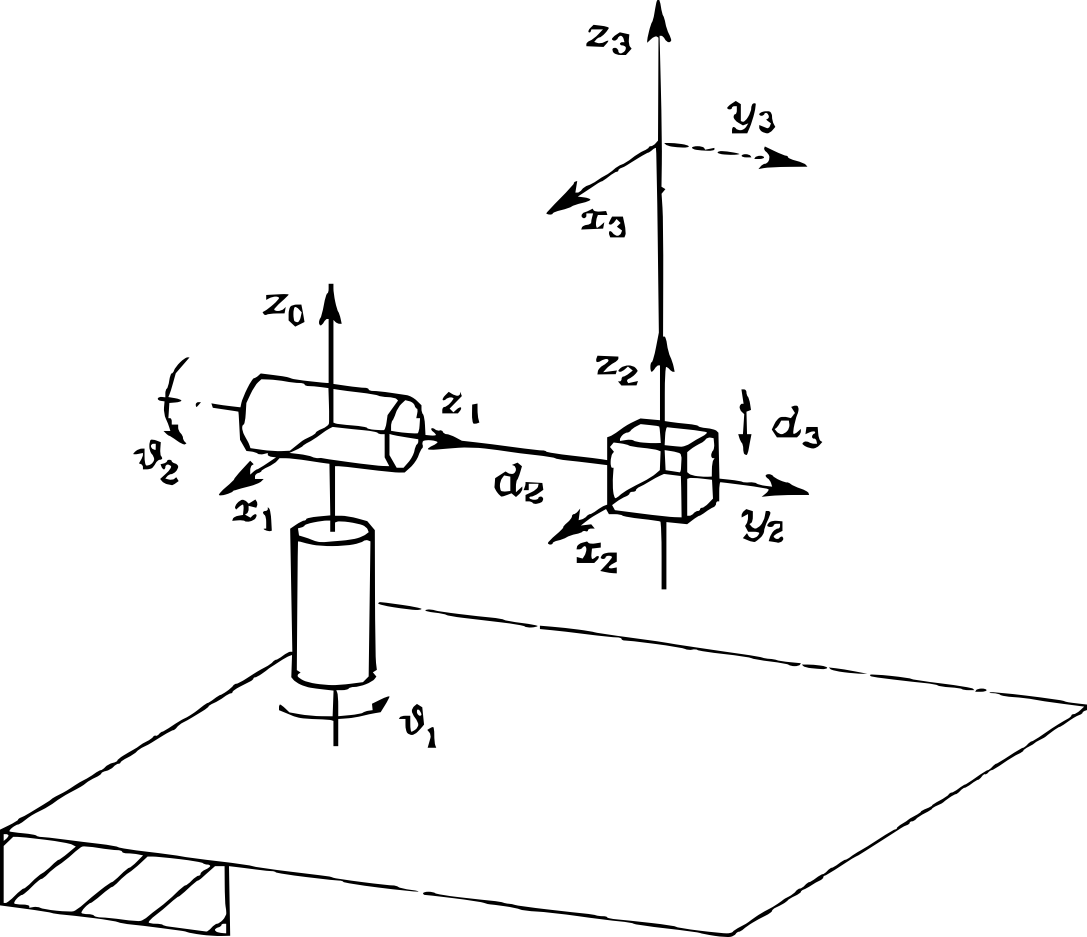


In [ ]:
# Zapišite rešitev tukaj
# id | d  | theta | a  | alfa
# 1  | 0  | v1    | 0  | -PI/2
# 2  | d2 | v2    | 0  | PI/2
# 3  | d3 | 0     | 0  | 0

* Napišite funkcijo <i>stanford_manipulator()</i>, ki za dani vektor parametrov vrne matrike transformacij iz izhodišča v vse tri sklepe. Dolžina prvih dveh sklepov naj bo 5 enot, zadnjega pa 2 enoti. Na podoben način določite tudi funkcijo <i>antropomorphic_manipulator()</i>, ki vrne isti rezultat za antropomorfni manipulator. Dolžina vseh treh sklepov naj bo $3$ enote. Pri reševanju naloge si pomagajta s spodaj priloženo funkcijo <i>dh_joint()</i>:

In [4]:
import numpy as np

def dh_joint(parameters):
    # Input: List of DH parameters for a joint, written as [a, alpha, d, theta]
    # Output: 4x4 homogeneous transformation matrix
    parameters[3] = np.radians(parameters[3])
    A = np.zeros((4, 4))

    A[0, 0] = np.cos(parameters[3])
    A[1, 0] = np.sin(parameters[3])
    A[0, 1] = -np.sin(parameters[3]) * np.cos(parameters[1])
    A[1, 1] = np.cos(parameters[3]) * np.cos(parameters[1])
    A[2, 1] = np.sin(parameters[1])
    A[0, 2] = np.sin(parameters[3]) * np.sin(parameters[1])
    A[1, 2] = -np.cos(parameters[3]) * np.sin(parameters[1])
    A[2, 2] = np.cos(parameters[1])
    A[0, 3] = parameters[0] * np.cos(parameters[3])
    A[1, 3] = parameters[0] * np.sin(parameters[3])
    A[2, 3] = parameters[2]
    A[3, 3] = 1
    
    return A

In [3]:
# Zapišite rešitev tukaj

import numpy as np

def stanford_manipulator(a1, a2, a3):
    A1 = dh_joint([5, -np.pi/2 , 0, a1])
    A2 = dh_joint([5, np.pi/2 , 0 , a2])
    A3 = dh_joint([2, 0, a3, 0])
    # Izračun A1, A2 in A3 na podlagi vhodnih parametrov a1, a2 in a3
    return [A1, A2, A3]

In [1]:
# Zapišite rešitev tukaj

import numpy as np

def antropomorphic_manipulator(a1, a2, a3):
    A1 = dh_joint([0, -np.pi/2 , 0, a1])
    A2 = dh_joint([1, 0 , 0, a2])
    A3 = dh_joint([2, 0 , a3, 0])
    # Izračun A1, A2 in A3 na podlagi vhodnih parametrov a1, a2 in a3    
    return [A1, A2, A3]
    

In [5]:
print(stanford_manipulator(20, 10, 10))
print()
print(antropomorphic_manipulator(20, 10, 5))

[array([[ 9.39692621e-01, -2.09426937e-17, -3.42020143e-01,
         4.69846310e+00],
       [ 3.42020143e-01,  5.75395780e-17,  9.39692621e-01,
         1.71010072e+00],
       [ 0.00000000e+00, -1.00000000e+00,  6.12323400e-17,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), array([[ 9.84807753e-01, -1.06328842e-17,  1.73648178e-01,
         4.92403877e+00],
       [ 1.73648178e-01,  6.03020831e-17, -9.84807753e-01,
         8.68240888e-01],
       [ 0.00000000e+00,  1.00000000e+00,  6.12323400e-17,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), array([[ 1., -0.,  0.,  2.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  1., 10.],
       [ 0.,  0.,  0.,  1.]])]

[array([[ 9.39692621e-01, -2.09426937e-17, -3.42020143e-01,
         0.00000000e+00],
       [ 3.42020143e-01,  5.75395780e-17,  9.39692621e-01,
         0.00000000e+00],
       [ 0.00000000e+00, 

* Vizualizirajte položaje posameznih sklepov robotskega manipulatorja za implementirani Stanfordski robotski model. Najprej izračunajte matrike za dano stanje manipulatorja, nato izhodiščno točko $(0, 0, 0)$ pomnožite z matriko vsakega sklepa posebej. Tako dobite položaje posameznih sklepov posebej. V nadaljevanju prikažite koordinatne sisteme za vse tri sklepe s pomočjo spodaj priložene funkcije <i>show_system()</i>. Za sam izris manipulatorja lahko uporabite matplitlib funkcije za risanje 3D grafov <i>plot3D</i> ter <i>scatter3D</i>, kjer ločeno podate vektorje treh koordinat sklepov (le-te dobite tako, da izhodiščno točko $(0, 0, 0)$ pomnožite z matriko ustreznega sklepa).

In [6]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def show_system(ax, M):
    
    x_1 = np.array([M[0, 3], M[0, 3] + M[0, 0]])
    y_1 = np.array([M[1, 3], M[1, 3] + M[1, 0]])
    z_1 = np.array([M[2, 3], M[2, 3] + M[2, 0]])
    
    x_2 = np.array([M[0, 3], M[0, 3] + M[0, 1]])
    y_2 = np.array([M[1, 3], M[1, 3] + M[1, 1]])
    z_2 = np.array([M[2, 3], M[2, 3] + M[2, 1]])
    
    x_3 = np.array([M[0, 3], M[0, 3] + M[0, 2]])
    y_3 = np.array([M[1, 3], M[1, 3] + M[1, 2]])
    z_3 = np.array([M[2, 3], M[2, 3] + M[2, 2]])
    
    ax.plot3D(x_1, y_1, z_1, 'red');
    ax.plot3D(x_2, y_2, z_2, 'green');
    ax.plot3D(x_3, y_3, z_3, 'blue');


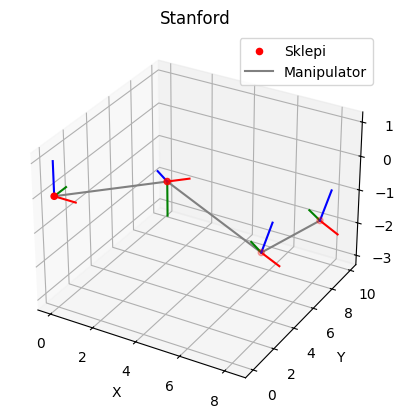

In [7]:
# Zapišite rešitev za Stanfordski manipulator tukaj
T = [np.eye(4)]
A = stanford_manipulator(50,30,2)
for a in A:
    T.append(T[-1] @ a)

positions = [T[i][:3, 3] for i in range(len(T))]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = zip(*positions)
ax.scatter3D(x, y, z, c='r', label='Sklepi')
ax.plot3D(x, y, z, 'gray', label='Manipulator')

for matrix in T:
    show_system(ax, matrix)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Stanford')
ax.legend()
plt.show()


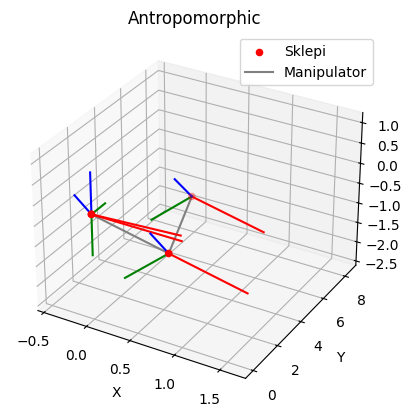

In [11]:
# Zapišite rešitev za antropomorfni manipulator tukaj
T = [np.eye(4)]
A = antropomorphic_manipulator(20,30,7)
for a in A:
    T.append(T[-1] @ a)

positions = [T[i][:3, 3] for i in range(len(T))]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = zip(*positions)
ax.scatter3D(x, y, z, c='r', label='Sklepi')
ax.plot3D(x, y, z, 'gray', label='Manipulator')

for matrix in T:
    show_system(ax, matrix)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Antropomorphic')
ax.legend()
plt.show()

* Z uporabo funkcije <i>antropomorphic_manipulator()</i> izračunajte razdaljo zadnjega sklepa manipulatorja do točke $(3, 3, 4)$ za vektor parametrov stanja $(0.2, 0.1, 0.3)$. Najprej izračunajte matrike za dano stanje manipulatorja, nato izhodiščno točko $(0, 0, 0)$ pomnožite z matriko zadnjega sklepa, da dobite položaj zadnjega sklepa v prostoru. Izračunajte Evklidsko razdaljo med točkama in jo izpišite v terminal, rezultat bi moral biti $3.257$.

In [12]:
# Zapišite rešitev tukaj
starting_point = np.array([0,0,0,1])
end_point = np.array([3, 3, 4])

theta1 = np.degrees(0.2)
theta2 = np.degrees(0.1)

T = antropomorphic_manipulator(theta1, theta2, 0.3)

final_pont = T[-1] @ starting_point
final_pont = final_pont[:3]

print(np.linalg.norm(np.array(final_pont) - np.array(end_point)))


4.867237409455183


* **(5 točk)** Iz prejšnje naloge izpeljite skripto, ki vizualizira razdaljo od točke $(3, 3, 4)$ pri fiksiranem parametru drugega sklepa za vrednosti parametrov prvega in zadnjega sklepa. Za vrednosti posameznega sklepa izberite ustrezen interval ter nato za posamezne pare vrednosti izračunajte razdaljo do točke. Razdalje lahko shranite v matriko in jo prikažete kot sliko, lahko pa si izberete tudi prikaz v obliki površinskega grafa.

In [13]:
# Zapišite rešitev tukaj

## Naloga 3 - Inverzna Kinematika

Veliko bolj praktično, kot ugotavljanje razdalje do določene točke za izbrani nabor parametrov, pa bi bilo, da bi robotskemu sistemu podali ciljno točko (in rotacijo), robotski sistem pa bi sam našel ustrezne parametre, v katerih bi manipulator bil v takem stanju. Takemu problemu rečemo povratna oziroma <i>inverzna</i> kinematika (okrajšano IK). Le-ta ni uporabna samo v robotiki, uporablja se tudi pri animaciji računalniških likov v računalniških igrah in animiranih filmih.

* Zakaj je inverzna kinematika v splošnem težko rešljiv problem?

   *Namig: koliko je lahko naborov parametrov, ki robotski manipulator postavijo v določeno stanje?*

In [ ]:
# Problem je, da za vsako pozicijo je več rešitev. Vsak DOF ima lahko več vrednosti, ki no koncu pride do rešitve. 

V nadaljevanju si bomo pogledali osnove reševanja problemov inverzne kinematike. Osnovna ideja je preprosta: za podane začetne parametre stanja manipulatorja, prostor preiskovanja ter ciljno točko iščemo take parametre, ki bodo minimizirali razdaljo zadnjega sklepa manipulatorja do ciljne točke. Ker pa se stvari pri implementaciji hitro zapletejo, boste sami implementirali samo nekaj osnovih idej, potem pa boste uporabili malo bolj napreden algoritem za reševanje problemov inverzne kinematike z uporabo stohastične optimizacije.

* **(10 točk)** Implementirajte preprost algoritem, ki optimizira samo položaj prvega sklepa antropomorfnega manipulatorja (druga dva pa sta statična). Uporabite funkcijo <i>antropomorphic_manipulator</i>, ki ste jo implementirali v prejšnji nalogi. Naloge se lahko lotite s katero od iterativnih metod optimizacije (na primer Newton-ovo metodo ali njenimi izpeljankami). Tak način reševanja je primeren za en parameter, bi se obnesel tudi za optimizacijo večjega števila parametrov?

In [78]:
# Zapišite rešitev tukaj

* Oglejte si kodo funkcije <i>.solve()</i> iz skripte <i>manus.py</i>. Ta algoritem rešuje problem inverzne kinematike z uporabo <a href="https://en.wikipedia.org/wiki/Coordinate_descent" target="_blank">iterativne metode spusta po koordinatah</a>. Algoritma sicer ni potrebno v celoti razumeti, saj ne sodi v ožjo snov predmeta, morate pa se po njem znajti dovolj, da ga uporabite v lastni kodi. Poleg tega, se je potrebno zavedati tudi omejitev algoritma, saj le-ta predstavlja zelo preprost način reševanja problema inverzne kinematike, ne konvergira vedno in le delno upošteva omejitve med posameznimi sklepi robotskega manipulatorja.

    Metodo <i>.solve()</i> preizkusite z uporabo spodaj priložene funkcije, ki premakne manipulator iz varne/začetne poze v točko $A = (100, 100, 100)$, nato v točko $B = (100, -100, 100)$, nakar vrne manipulator nazaj v začetno pozo.

In [67]:
import manus

server = manus.Server(address='192.168.56.101', port=80)
manipulator = manus.Manipulator(server)

safe_state = [0.0, 2.6179938316345215, -1.5707963705062866, -1.2217304706573486, 0.0, 0.0, 0.0]
point_A = [100, 100, 100]
point_B = [100, -100, 100]

# Move manipulator to the safe state
manipulator.move(safe_state)

# Solve IK to get the goal state for moving the manipulator to the point_A
state_A = manipulator.solve(point_A)
# Move the manipulator
manipulator.move(state_A)

# Solve IK to get the goal state for moving the manipulator to the point_B
state_B = manipulator.solve(point_B)
# Move the manipulator
manipulator.move(state_B)

# Move manipulator back to the safe state
manipulator.move(safe_state)

True

* Napišite skripto, ki robotski manipulator krožno premika med štirimi točkami kvadrata nad delovno površino. Koordinate točk si izberite sami, vendar bodite pozorni, da je ena virtualna enota enaka enemu milimetru v naravi ter, da točke ne bodo take, da bi manipulator prišel v ilegalno stanje ter se s tem kvarili motorji. Manipulator naj se torej premakne v točko $A$, nato v točko $B$, točko $C$, točko $D$. Nato sledi spet točka $A$ in tako dalje.

In [97]:
# Zapišite rešitev tukaj

import manus

server = manus.Server(address='192.168.56.101', port=80)
manipulator = manus.Manipulator(server)
points = [[200, 200, 100],
          [50, 200, 100],
          [50, 0, 100],
          [200, 0, 100]]

safe_state = [0.0, 2.6179938316345215, -1.5707963705062866, -1.2217304706573486, 0.0, 0.0, 0.0]

def draw_square():
    for point in points:
        state = manipulator.solve(point)
        manipulator.move(state)
    # Krožno premikanje med štirimi točkami kvadrata
    manipulator.move(safe_state)

draw_square()

* Implementirajte manever manipulatorja, da bo le-ta nad delovno površino narisal inicialki vašega imena in priimka. Predstavljajte si, da inicialke rišete na papir, ki leži na delovni površini. Naloge se lotite z uporabo inverzne kinematike (bodite pozorni, da so točke razporejene v pravilnem vrstnem redu, ter, da jih izberete dovolj na gosto, saj ne morete krmiliti vsakega sklepa posebej).

In [98]:
# Zapišite rešitev tukaj
points = [[200, 200, 100],
          [50, 200, 100],
          [100, 100, 100],
          [50, 0, 100],
          [200, 0, 100],
          [200, 200, 100],
          [50, 200, 100],
          [125, 200, 100],
          [50, 100, 100],
          [125, 200, 100],
          [200, 100, 100]]

safe_state = [0.0, 2.6179938316345215, -1.5707963705062866, -1.2217304706573486, 0.0, 0.0, 0.0]

def draw_MK():
    for point in points:
        state = manipulator.solve(point)
        manipulator.move(state)
    manipulator.move(safe_state)

draw_MK()

* **(10 točk)** Eno izmed implementacij risanja inicialk lahko v navezavi s pravim robotskim manipulatorjem izpopolnite tako, da v prijemalo postavite pravi svinčnik ali kemik, na delovno površino pa list papirja (delovno površino res zaščitite pred poškodbami!). Roka naj na list nariše črko, število dodatnih točk pa bo odvisno od kvalitete izrisa. Na zagovoru vam ni potrebno ponoviti celotnega procesa, lahko prinesite izvorno kodo, list z izrisano črko ter posnetek risanja.

In [ ]:
# Zapišite rešitev tukaj

* **(10 točk)** Z uporabo inverzne kinematike napišite program, ki bo na vnaprej določenem mestu na delovni površini pobral kocko ter jo prenesel na drugo vnaprej določeno mesto. Nato se bo vrnil po novo kocko in jo postavil na prvo kocko. Ta proces se naj ponavlja vmes pa lahko čakate nekaj sekund za postavitev nove kocke ali pa na pritisk tipke. Kot je očitno, morate to nalogo v večjem delu izdelati v laboratoriju s pravo robotsko roko. Za polno število točk morate eno na drugo zložiti vsaj pet kock. Končni rezultat lahko posnamete in na zagovor prinesete posnetek in izvorno kodo.

In [ ]:
# Zapišite rešitev tukaj